In [3]:
path = r'G:/563project/train.csv'
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn import datasets, ensemble

In [5]:

def read_data(path: str) -> pd.DataFrame:
    data = pd.read_csv(path)
    return data


def miss_data_count(data: pd.DataFrame) -> pd.Series:
    miss_data = data.isnull().sum()  # find NA data count for each column
    return miss_data[miss_data > 0].sort_values(ascending=True)  # order miss data count from low to high


def general_linear_regression(y, x):
    # y = a_1 * x_1 + a_2 * x_2 + ... + b
    # Number of a_i equals to number of the column of x

    # use sklearn to do a linear regression on x y
    linear_regression = LinearRegression()
    linear_regression.fit(x, y)
    plt.plot(linear_regression.predict(x.values), y.values, '.')
    plt.show()

    return linear_regression

In [6]:
    data = read_data(path)
    miss_data = miss_data_count(data)
    

In [7]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


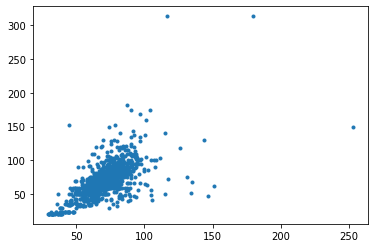

In [8]:
    xy = data[['LotFrontage', 'LotArea', '1stFlrSF', 'TotRmsAbvGrd']]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, ['LotArea', '1stFlrSF', 'TotRmsAbvGrd']].applymap(lambda x : np.sqrt(x))
    y = xy.loc[:, ['LotFrontage']]
    linear_regression = general_linear_regression(y, x)


In [9]:
df = data

In [13]:
a = np.array([df['LotArea'], df['1stFlrSF'], df['1stFlrSF']])

In [17]:
aa = a[[0,1,2],0]

In [27]:
aaa =np.sqrt(aa)
y_1 = linear_regression.predict(aaa.reshape(1, -1))

In [21]:
aa.reshape(-1, 1)

array([[8450],
       [ 856],
       [ 856]], dtype=int64)

In [22]:
aa

array([8450,  856,  856], dtype=int64)

In [24]:
np.sqrt(aa)

array([91.92388155, 29.25747768, 29.25747768])

In [32]:
y_1.ravel()[0]

274.2655626021743

In [33]:
def impute_LotFrontage(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (sqrt(LotArea) + sqrt(1stFlrSF) + TotRmsAbvGrd) + b
    xy = data[['LotFrontage', 'LotArea', '1stFlrSF', 'TotRmsAbvGrd']]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, ['LotArea', '1stFlrSF', 'TotRmsAbvGrd']].applymap(lambda x : np.sqrt(x))
    y = xy.loc[:, ['LotFrontage']]
    linear_regression = general_linear_regression(y, x)

    def impute_lotfrontage(df):
        if pd.isna(df['LotFrontage']):
            x_1 = np.array([df['LotArea'], df['1stFlrSF'], df['1stFlrSF']])
            x_2 = np.sqrt(x_1)
            y_1 = linear_regression.predict(x_2.reshape(1, -1))
            print(x_2, y_1)
            return y_1.ravel()[0]
        else:
            return df['LotFrontage']

    data.loc[:, ['LotFrontage']] = data.apply(impute_lotfrontage, axis=1)
    return data

D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


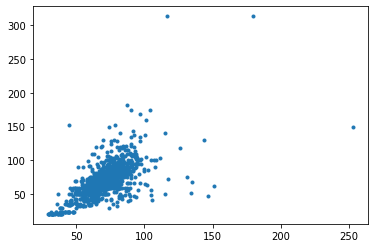

[101.89209979  33.27160952  33.27160952] [[313.86831897]]
[113.87712676  30.19933774  30.19933774] [[292.68088336]]
[104.49880382  35.39774004  35.39774004] [[333.60105893]]
[106.02358228  31.68595904  31.68595904] [[301.97768059]]
[90.80748868 32.55764119 32.55764119] [[302.49337224]]
[92.43376007 35.04283094 35.04283094] [[324.89778386]]
[95.81231654 29.73213749 29.73213749] [[280.20883162]]
[95.91663047 30.62678566 30.62678566] [[288.05045322]]
[117.76671856  28.17800561  28.17800561] [[276.88259954]]
[96.82458366 32.51153641 32.51153641] [[304.89045337]]
[141.0673598   46.97871859  46.97871859] [[451.48955155]]
[92.0597632  30.85449724 30.85449724] [[288.24008502]]
[92.35799911 28.35489376 28.35489376] [[266.60525124]]
[98.81801455 26.07680962 26.07680962] [[249.76601541]]
[102.97086967  40.1248053   40.1248053 ] [[374.06690923]]
[88.07950954 35.0142828  35.0142828 ] [[322.6238436]]
[88.03408431 27.82085549 27.82085549] [[259.94219651]]
[144.91376746  47.52893855  47.52893855] [[45

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [34]:
impute_LotFrontage(data)

In [53]:
def impute_MasVnrArea(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (GarageArea
    y_label = 'MasVnrArea'
    x_label = ['YearBuilt', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
    xy = data[[y_label] + x_label]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    xy = xy[xy['MasVnrArea'] != 0]
    x = xy.loc[:, x_label]
    y = xy.loc[:, ['MasVnrArea']]
    x = x.applymap(np.sqrt)
    linear_regression = general_linear_regression(y, x)

    def impute_masvnrarea(df):
        if pd.isna(df[y_label]):
            x_1 = np.array([df[x_label].values]).astype('float').ravel()
            print(x_1)
            x_2 = np.sqrt(x_1)
            y_1 = linear_regression.predict(x_2.reshape(1, -1))
            print(x_2, y_1)
            return y_1.ravel()[0]
            # a = linear_regression.predict(np.array(df[x_label]).reshape(1, -1))
            # return a
        else:
            return df[y_label]

    data.loc[:, [y_label]] = data.apply(impute_masvnrarea, axis=1)
    return data


D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


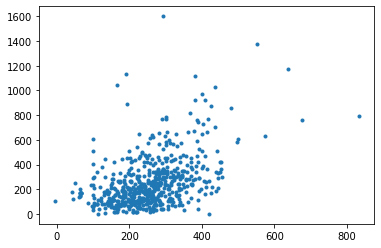

[2002. 1960.  440.  860.]
[44.74371464 44.27188724 20.97617696 29.3257566 ] [[274.31797842]]
[1957. 2515.  484. 2035.]
[44.23799272 50.14977567 22.         45.11097427] [[430.76828357]]
[2007. 1665.  562.  813.]
[44.79955357 40.80441153 23.70653918 28.51315486] [[230.99037659]]
[2003. 1200.  555. 1176.]
[44.754888   34.64101615 23.55843798 34.2928564 ] [[160.81566935]]
[2007. 1428.  480. 1428.]
[44.79955357 37.78888726 21.9089023  37.78888726] [[199.43078763]]
[2006. 1241.  569. 1241.]
[44.78839135 35.22782991 23.85372088 35.22782991] [[168.4832614]]
[2006. 2076.  850. 2076.]
[44.78839135 45.563143   29.15475947 45.563143  ] [[346.40046188]]
[2002. 2031.  577. 1128.]
[44.74371464 45.06661736 24.0208243  33.58571125] [[303.82074221]]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [54]:
impute_MasVnrArea(data)

In [52]:
np.sqrt([1,2,3])

array([1.        , 1.41421356, 1.73205081])

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def read_data(path: str) -> pd.DataFrame:
    data = pd.read_csv(path)
    return data


def miss_data_count(data: pd.DataFrame) -> pd.Series:
    miss_data = data.isnull().sum()  # find NA data count for each column
    return miss_data[miss_data > 0].sort_values(ascending=True)  # order miss data count from low to high


def general_linear_regression(y, x):
    # y = a_1 * x_1 + a_2 * x_2 + ... + b
    # Number of a_i equals to number of the column of x

    # use sklearn to do a linear regression on x y
    linear_regression = LinearRegression()
    linear_regression.fit(x, y)
    plt.plot(linear_regression.predict(x.values), y.values, '.')
    plt.show()

    return linear_regression


def impute_LotFrontage(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (sqrt(LotArea) + sqrt(1stFlrSF) + TotRmsAbvGrd) + b
    xy = data[['LotFrontage', 'LotArea', '1stFlrSF', 'TotRmsAbvGrd']]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, ['LotArea', '1stFlrSF', 'TotRmsAbvGrd']].applymap(lambda x : np.sqrt(x))
    y = xy.loc[:, ['LotFrontage']]
    linear_regression = general_linear_regression(y, x)

    def impute_lotfrontage(df):
        if pd.isna(df['LotFrontage']):
            x_1 = np.array([df['LotArea'], df['1stFlrSF'], df['1stFlrSF']])
            x_2 = np.sqrt(x_1)
            y_1 = linear_regression.predict(x_2.reshape(1, -1))
            print(x_2, y_1)
            return y_1.ravel()[0]
        else:
            return df['LotFrontage']

    data.loc[:, ['LotFrontage']] = data.apply(impute_lotfrontage, axis=1)
    return data


def impute_MasVnrArea(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (GarageArea
    y_label = 'MasVnrArea'
    x_label = ['YearBuilt', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
    xy = data[[y_label] + x_label]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    xy = xy[xy['MasVnrArea'] != 0]
    x = xy.loc[:, x_label]
    y = xy.loc[:, ['MasVnrArea']]
    x = x.applymap(np.sqrt)
    linear_regression = general_linear_regression(y, x)

    def impute_masvnrarea(df):
        if pd.isna(df[y_label]):
            x_1 = np.array([df[x_label].values]).astype('float').ravel()
            print(x_1)
            x_2 = np.sqrt(x_1)
            y_1 = linear_regression.predict(x_2.reshape(1, -1))
            print(x_2, y_1)
            return y_1.ravel()[0]
            # a = linear_regression.predict(np.array(df[x_label]).reshape(1, -1))
            # return a
        else:
            return df[y_label]

    data.loc[:, [y_label]] = data.apply(impute_masvnrarea, axis=1)
    return data


def impute_by_linear_regression(data: pd.DataFrame, x_label: str, y_label: list) -> pd.DataFrame:
    xy = data[[y_label] + x_label]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, x_label].applymap(lambda z: np.sqrt(z))
    y = xy.loc[:, [y_label]]
    linear_regression = general_linear_regression(y, x)

    def impute_x(df):
        if pd.isna(df[y_label]):
            return linear_regression.predict(np.array(df[x_label]).reshape(1, -1))
        else:
            return df[y_label]

    data.loc[:, [y_label]] = data.apply(impute_x, axis=1)
    return data


def greedy_target_encoding(data: pd.DataFrame, column_name: str, a: int) -> pd.DataFrame:
    # A common setting for p is the average target value in the dataset
    # p is a experience parameter
    print(column_name)
    train_data_path = r'G:\563project\train.csv'
    train_data = pd.read_csv(train_data_path)
    train_data = train_data.loc[:, [column_name, 'SalePrice']]
    train_data.fillna('It is Na', inplace=True)
    train_data_group = train_data.groupby(column_name).agg('sum')
    sale_price_sum = train_data_group.sum().values.ravel()
    train_data_group = (train_data_group + a * sale_price_sum) / train_data_group + a
    dic = {}
    dic = dict(zip(list(train_data_group.index), list(train_data_group.SalePrice)))
    data[column_name] = data[column_name].fillna('It is Na').map(lambda x: dic[x])
    return data



def clean_data(path: str):
    data = read_data(path)
    miss_data = miss_data_count(data)
    print(miss_data)

    # impute column LotFrontage as an example
    data = impute_LotFrontage(data)
    # impute column MasVnrArea
    data = impute_MasVnrArea(data)

    # Impute GarageQual and apply greedy target encoding with reasonable hyper parameters.
    data = greedy_target_encoding(data, 'GarageQual', 0.5)

    # impute features those NA means don't have a xxx
    cols1 = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageFinish",
             "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1",
             "MasVnrType"]
    for col in cols1:
        data[col].fillna("It is Na", inplace=True)

    # impute features those NA means don't have a xxx so that the features should be 0
    cols2 = ["BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
    for col in cols2:
        data[col].fillna(0, inplace=True)

    # Apply greedy target encoding with reasonable hyper parameters on col1 and col2.
    for col in (cols1 + cols2):
        data = greedy_target_encoding(data, col, 0.5)

    return data





Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64
[101.89209979  33.27160952  33.27160952] [[313.86831897]]
[113.87712676  30.19933774  30.19933774] [[292.68088336]]
[104.49880382  35.39774004  35.39774004] [[333.60105893]]
[106.02358228  31.68595904  31.68595904] [[301.97768059]]
[90.80748868 32.55764119 32.55764119] [[302.49337224]]
[92.43376007 35.04283094 35.04283094] [[324.89778386]]
[95.81231654 29.73213749 29.73213749] [[280.20883162]]
[95.91663047 30.62678566 30.62678566] [[288.05045322]]
[117.76671856  28.17800561  28.17800561] [[276.88259954]]
[96.82458366 32.51153641 32.51153641] [[304.89045337]]
[141.0673598   46.97871

D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Pip1\AppData\Local\Temp/ipykernel_15432/2282854263.py:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Pip1\AppData\Local\Temp/ipykernel_15432/2282854263.py:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the f

PoolQC
MiscFeature
Alley
Fence
FireplaceQu
GarageCond
GarageFinish
GarageYrBlt
GarageType
BsmtExposure
BsmtCond
BsmtQual
BsmtFinType2
BsmtFinType1
MasVnrType
BsmtUnfSF
TotalBsmtSF
GarageCars
BsmtFinSF2
BsmtFinSF1
GarageArea


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,2.025879,Reg,Lvl,AllPub,...,0,2.003847,2.097136,2.015994,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,2.025879,Reg,Lvl,AllPub,...,0,2.003847,2.097136,2.015994,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,2.025879,IR1,Lvl,AllPub,...,0,2.003847,2.097136,2.015994,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,2.025879,IR1,Lvl,AllPub,...,0,2.003847,2.097136,2.015994,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,2.025879,IR1,Lvl,AllPub,...,0,2.003847,2.097136,2.015994,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,2.025879,Reg,Lvl,AllPub,...,0,2.003847,2.097136,2.015994,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,2.025879,Reg,Lvl,AllPub,...,0,2.003847,7.155259,2.015994,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,2.025879,Reg,Lvl,AllPub,...,0,2.003847,14.010749,19.327893,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,2.025879,Reg,Lvl,AllPub,...,0,2.003847,2.097136,2.015994,0,4,2010,WD,Normal,142125


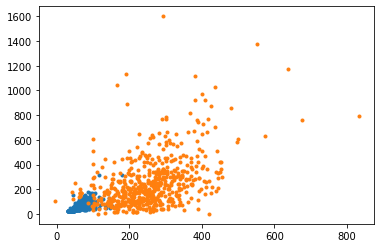

In [56]:
clean_data(path)

In [57]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [59]:
cols1 = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageFinish",
             "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1",
             "MasVnrType"]

cols2 = ["BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]

In [60]:
cols = cols1 + cols2 + ['GarageQual' ,'MasVnrArea', 'LotFrontage']

In [61]:
data.loc[:, cols]

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageCond,GarageFinish,GarageYrBlt,GarageType,BsmtExposure,...,MasVnrType,BsmtUnfSF,TotalBsmtSF,GarageCars,BsmtFinSF2,BsmtFinSF1,GarageArea,GarageQual,MasVnrArea,LotFrontage
0,NaN,NaN,NaN,NaN,NaN,TA,RFn,2003.0,Attchd,No,...,BrkFace,150,856,2,0,706,548,TA,196.0,65.0
1,NaN,NaN,NaN,NaN,TA,TA,RFn,1976.0,Attchd,Gd,...,None,284,1262,2,0,978,460,TA,0.0,80.0
2,NaN,NaN,NaN,NaN,TA,TA,RFn,2001.0,Attchd,Mn,...,BrkFace,434,920,2,0,486,608,TA,162.0,68.0
3,NaN,NaN,NaN,NaN,Gd,TA,Unf,1998.0,Detchd,No,...,None,540,756,3,0,216,642,TA,0.0,60.0
4,NaN,NaN,NaN,NaN,TA,TA,RFn,2000.0,Attchd,Av,...,BrkFace,490,1145,3,0,655,836,TA,350.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,TA,TA,RFn,1999.0,Attchd,No,...,None,953,953,2,0,0,460,TA,0.0,62.0
1456,NaN,NaN,NaN,MnPrv,TA,TA,Unf,1978.0,Attchd,No,...,Stone,589,1542,2,163,790,500,TA,119.0,85.0
1457,NaN,Shed,NaN,GdPrv,Gd,TA,RFn,1941.0,Attchd,No,...,None,877,1152,1,0,275,252,TA,0.0,66.0
1458,NaN,NaN,NaN,NaN,NaN,TA,Unf,1950.0,Attchd,Mn,...,None,0,1078,1,1029,49,240,TA,0.0,68.0


Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64
[101.89209979  33.27160952  33.27160952] [[313.86831897]]
[113.87712676  30.19933774  30.19933774] [[292.68088336]]
[104.49880382  35.39774004  35.39774004] [[333.60105893]]
[106.02358228  31.68595904  31.68595904] [[301.97768059]]
[90.80748868 32.55764119 32.55764119] [[302.49337224]]
[92.43376007 35.04283094 35.04283094] [[324.89778386]]
[95.81231654 29.73213749 29.73213749] [[280.20883162]]
[95.91663047 30.62678566 30.62678566] [[288.05045322]]
[117.76671856  28.17800561  28.17800561] [[276.88259954]]
[96.82458366 32.51153641 32.51153641] [[304.89045337]]
[141.0673598   46.97871

D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Pip1\AppData\Local\Temp/ipykernel_15432/2282854263.py:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Pip1\AppData\Local\Temp/ipykernel_15432/2282854263.py:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the f

PoolQC
MiscFeature
Alley
Fence
FireplaceQu
GarageCond
GarageFinish
GarageYrBlt
GarageType
BsmtExposure
BsmtCond
BsmtQual
BsmtFinType2
BsmtFinType1
MasVnrType
BsmtUnfSF
TotalBsmtSF
GarageCars
BsmtFinSF2
BsmtFinSF1
GarageArea


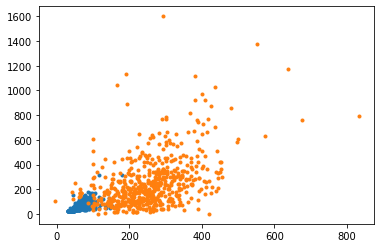

In [62]:
data = clean_data(path)

In [64]:
data.loc[:, cols]

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageCond,GarageFinish,GarageYrBlt,GarageType,BsmtExposure,...,MasVnrType,BsmtUnfSF,TotalBsmtSF,GarageCars,BsmtFinSF2,BsmtFinSF1,GarageArea,GarageQual,MasVnrArea,LotFrontage
0,2.003847,2.015994,2.025879,2.097136,2.854329,2.030121,3.048818,13.272360,2.248216,2.336608,...,2.949946,634.941118,246.759931,2.371801,2.059900,316.333070,385.990460,2.037319,196.0,65.0
1,2.003847,2.015994,2.025879,2.097136,3.551087,2.030121,3.048818,29.804348,2.248216,5.324814,...,2.478491,139.551194,361.861454,2.371801,2.059900,729.172028,108.910925,2.037319,0.0,80.0
2,2.003847,2.015994,2.025879,2.097136,3.551087,2.030121,3.048818,28.716847,2.248216,7.509298,...,2.949946,176.314657,386.270497,2.371801,2.059900,367.859148,288.614072,2.037319,162.0,68.0
3,2.003847,2.015994,2.025879,2.097136,3.035485,2.030121,3.035644,21.935956,4.045079,2.336608,...,2.478491,481.775763,90.695970,3.856580,2.059900,430.306731,206.832406,2.037319,0.0,60.0
4,2.003847,2.015994,2.025879,2.097136,3.551087,2.030121,3.048818,25.450470,2.248216,4.392001,...,2.949946,144.776712,260.364118,3.856580,2.059900,151.667678,144.319652,2.037319,350.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.003847,2.015994,2.025879,2.097136,3.551087,2.030121,3.048818,23.651381,2.248216,2.336608,...,2.478491,381.674073,381.674073,2.371801,2.059900,3.208625,108.910925,2.037319,0.0,62.0
1456,2.003847,2.015994,2.025879,7.155259,3.551087,2.030121,3.035644,44.796772,2.248216,2.336608,...,5.385090,630.416538,630.416538,2.371801,630.416538,288.614072,106.661616,2.037319,119.0,85.0
1457,2.003847,19.327893,2.025879,14.010749,3.035485,2.030121,3.048818,104.320142,2.248216,2.336608,...,2.478491,497.081512,180.702813,4.293703,2.059900,300.984066,166.693837,2.037319,0.0,66.0
1458,2.003847,2.015994,2.025879,2.097136,2.854329,2.030121,3.035644,40.844708,2.248216,7.509298,...,2.478491,9.675042,228.068552,4.293703,930.769819,930.769819,27.532981,2.037319,0.0,68.0


In [66]:
df = data.corr()

In [67]:
df

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,0.021109,-0.033226,0.000856,-0.028365,0.012609,-0.012713,-0.021998,-0.015192,...,-0.046635,0.001330,0.057044,0.060246,0.004777,0.018972,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.115807,-0.139781,0.142127,0.032628,-0.059316,0.027850,0.040581,-0.056038,...,-0.043825,-0.026030,0.008283,0.003316,-0.071550,0.035239,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,0.021109,-0.115807,1.000000,0.267874,-0.117394,0.030876,0.010908,0.065041,-0.016331,0.069976,...,0.045850,0.014569,0.048231,0.036748,-0.005809,0.020641,0.075976,-0.010144,0.014876,0.114748
LotArea,-0.033226,-0.139781,0.267874,1.000000,-0.073155,0.105806,-0.005636,0.014228,0.013788,0.100657,...,0.020423,0.043160,0.077672,0.077970,-0.024731,0.020929,0.038068,0.001205,-0.014261,0.263843
Alley,0.000856,0.142127,-0.117394,-0.073155,1.000000,-0.074511,0.078544,-0.265121,-0.042501,-0.017764,...,-0.029936,-0.024056,-0.017676,-0.017120,0.013702,-0.012800,-0.005121,-0.017276,-0.018384,-0.127849
OverallQual,-0.028365,0.032628,0.030876,0.105806,-0.074511,1.000000,-0.091932,0.572323,0.550684,0.034477,...,0.030371,0.064886,0.065166,0.057431,-0.122797,-0.042352,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,0.010908,-0.005636,0.078544,-0.091932,1.000000,-0.375983,0.073741,-0.058258,...,0.025504,0.054811,-0.001985,-0.002257,0.123274,0.025680,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.065041,0.014228,-0.265121,0.572323,-0.375983,1.000000,0.592855,0.051539,...,0.031355,-0.050364,0.004950,0.010283,-0.138762,-0.037009,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,-0.016331,0.013788,-0.042501,0.550684,0.073741,0.592855,1.000000,0.038014,...,0.045286,-0.038740,0.005829,0.007626,-0.089035,-0.058630,-0.010286,0.021490,0.035743,0.507101
MasVnrType,-0.015192,-0.056038,0.069976,0.100657,-0.017764,0.034477,-0.058258,0.051539,0.038014,1.000000,...,-0.013178,-0.017694,-0.007933,-0.006681,-0.000462,-0.006659,0.011570,0.009050,-0.009001,0.040193


In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def read_data(path: str) -> pd.DataFrame:
    data = pd.read_csv(path)
    return data


def miss_data_count(data: pd.DataFrame) -> pd.Series:
    miss_data = data.isnull().sum()  # find NA data count for each column
    return miss_data[miss_data > 0].sort_values(ascending=True)  # order miss data count from low to high


def general_linear_regression(y, x):
    # y = a_1 * x_1 + a_2 * x_2 + ... + b
    # Number of a_i equals to number of the column of x

    # use sklearn to do a linear regression on x y
    linear_regression = LinearRegression()
    linear_regression.fit(x, y)
    plt.plot(linear_regression.predict(x.values), y.values, '.')
    plt.show()

    return linear_regression


def impute_LotFrontage(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (sqrt(LotArea) + sqrt(1stFlrSF) + TotRmsAbvGrd) + b
    xy = data[['LotFrontage', 'LotArea', '1stFlrSF', 'TotRmsAbvGrd']]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, ['LotArea', '1stFlrSF', 'TotRmsAbvGrd']].applymap(lambda x : np.sqrt(x))
    y = xy.loc[:, ['LotFrontage']]
    linear_regression = general_linear_regression(y, x)

    def impute_lotfrontage(df):
        if pd.isna(df['LotFrontage']):
            x_1 = np.array([df['LotArea'], df['1stFlrSF'], df['1stFlrSF']])
            x_2 = np.sqrt(x_1)
            y_1 = linear_regression.predict(x_2.reshape(1, -1))
            return y_1.ravel()[0]
        else:
            return df['LotFrontage']

    data.loc[:, ['LotFrontage']] = data.apply(impute_lotfrontage, axis=1)
    return data


def impute_MasVnrArea(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (GarageArea
    y_label = 'MasVnrArea'
    # x_label = ['YearBuilt', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
    x_label = ['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'FullBath']
    xy = data[[y_label] + x_label]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    xy = xy[xy['MasVnrArea'] != 0]
    x = xy.loc[:, x_label]
    y = xy.loc[:, ['MasVnrArea']]
    # x = x.applymap(np.abs)
    # x = x.applymap(lambda z: z + 1)
    # x = x.applymap(np.log)
    linear_regression = general_linear_regression(y, x)

    def impute_masvnrarea(df):
        if pd.isna(df[y_label]):
            x_1 = np.array([df[x_label].values]).astype('float').ravel()
            y_1 = linear_regression.predict(x_1.reshape(1, -1))
            # print(x_1, y_1)
            return y_1.ravel()[0]
            # a = linear_regression.predict(np.array(df[x_label]).reshape(1, -1))
            # return a
        else:
            return df[y_label]

    data.loc[:, [y_label]] = data.apply(impute_masvnrarea, axis=1)
    return data


def impute_by_linear_regression(data: pd.DataFrame, x_label: str, y_label: list) -> pd.DataFrame:
    xy = data[[y_label] + x_label]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, x_label].applymap(lambda z: np.sqrt(z))
    y = xy.loc[:, [y_label]]
    linear_regression = general_linear_regression(y, x)

    def impute_x(df):
        if pd.isna(df[y_label]):
            return linear_regression.predict(np.array(df[x_label]).reshape(1, -1))
        else:
            return df[y_label]

    data.loc[:, [y_label]] = data.apply(impute_x, axis=1)
    return data


def greedy_target_encoding(data: pd.DataFrame, column_name: str, a: int) -> pd.DataFrame:
    # A common setting for p is the average target value in the dataset
    # p is a experience parameter
    # print(column_name)
    train_data_path = r'G:\563project\train.csv'
    train_data = pd.read_csv(train_data_path)
    train_data = train_data.loc[:, [column_name, 'SalePrice']]
    train_data.fillna('It is Na', inplace=True)
    train_data_group = train_data.groupby(column_name).agg('sum')
    sale_price_sum = train_data_group.sum().values.ravel()
    train_data_group = (train_data_group + a * sale_price_sum) / train_data_group + a
    dic = {}
    dic = dict(zip(list(train_data_group.index), list(train_data_group.SalePrice)))
    # print(column_name, dic)
    data[column_name] = data[column_name].fillna('It is Na').map(lambda x: dic[x])
    return data



def clean_data(path: str):
    data = read_data(path)
    miss_data = miss_data_count(data)
    print(miss_data)

    # Impute GarageQual and apply greedy target encoding with reasonable hyper parameters.
    data = greedy_target_encoding(data, 'GarageQual', 0.5)

    # impute features those NA means don't have a xxx
    cols1 = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageFinish",
             "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1",
             "MasVnrType"]
    for col in cols1:
        data[col].fillna("It is Na", inplace=True)

    # impute features those NA means don't have a xxx so that the features should be 0
    cols2 = ["BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
    for col in cols2:
        data[col].fillna(0, inplace=True)

    # Apply greedy target encoding with reasonable hyper parameters on col1 and col2.
    for col in (cols1 + cols2):
        data = greedy_target_encoding(data, col, 0.5)

    # impute column LotFrontage as an example
    data = impute_LotFrontage(data)
    # impute column MasVnrArea
    data = impute_MasVnrArea(data)
    # cols = cols1 + cols2 + ['GarageQual', 'MasVnrArea', 'LotFrontage']
    # data = data.loc[:, cols]
    return data

def pca_redude_dimension(df, n):
    pca = PCA(n_components=n)
    pca.fit(df)
    # print(pca.explained_variance_ratio_)
    # print(pca.explained_variance_)
    df_new = pca.transform(df)
    df_new = pd.DataFrame(df_new)
    df_new.to_csv(r'new_feature.csv')
    return pca

def coumpte_variance_importance(data):
    column_count = len(data_num.columns)
    x_total = data.iloc[:, :column_count - 1]
    y_total = data.iloc[:, column_count - 1]
    reg2 = ensemble.GradientBoostingRegressor(**params)
    reg2.fit(x_total, y_total)
    y_reg = reg2.predict(x_total)
    x_total['predict'] = y_reg
    x_total.corr()
    corr = np.abs(x_total.corr().predict.values)
    labels = list(x_total.columns)
    sorting = corr.argsort()
    labels_sort = [labels[i] for i in sorting]
    corr_sort = (np.sort(corr))
    print(corr_sort)
    plt.barh(range(len(corr_sort)), corr_sort, tick_label=labels_sort)
    plt.show()





if __name__ == '__main__':
    import matplotlib as mpl
    mpl.use('TkAgg')
    path = r'G:/563project/train.csv'

    data = clean_data(path)
    data_num = data._get_numeric_data()
    pca_redude_dimension(data_num, 3)
    params = {
        "n_estimators": 500,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.01,
    }
    column_count = len(data_num.columns)
    coumpte_variance_importance(data_num)
    x_data = data_num.iloc[:, :column_count - 1]
    y_data = data_num.iloc[:, column_count - 1]
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_data, y_data)


    # feature_importance = reg.feature_importances_
    # sorted_idx = np.argsort(feature_importance)
    # pos = np.arange(sorted_idx.shape[0]) + 0.5
    # fig = plt.figure(figsize=(12, 6))
    # plt.subplot(1, 2, 1)
    # plt.barh(pos, feature_importance[sorted_idx], align="center")
    # plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
    # plt.title("Feature Importance (MDI)")
    #
    # result = permutation_importance(
    #     reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    # )
    # sorted_idx = result.importances_mean.argsort()
    # plt.subplot(1, 2, 2)
    # plt.boxplot(
    #     result.importances[sorted_idx].T,
    #     vert=False,
    #     labels=np.array(diabetes.feature_names)[sorted_idx],
    # )
    # plt.title("Permutation Importance (test set)")
    # fig.tight_layout()
    # plt.show()
    #
    #


Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


[0.01322798 0.01641637 0.01990619 0.02147394 0.02481259 0.02778146
 0.02903451 0.04117212 0.04169109 0.0475746  0.05812208 0.06177632
 0.08058063 0.08373247 0.08415519 0.08752226 0.0886964  0.09847099
 0.10056154 0.10351117 0.10661692 0.11045339 0.1107941  0.11513866
 0.11827991 0.12205252 0.12315938 0.12747796 0.13090182 0.13147747
 0.15305417 0.16275452 0.17639286 0.20343094 0.21275553 0.21967083
 0.23377173 0.2567427  0.26753765 0.28506383 0.32034726 0.32680265
 0.32931294 0.473389   0.4908769  0.51774659 0.53444278 0.55370171
 0.57742801 0.62547274 0.73011389 0.82594678 1.        ]


In [4]:
data_num

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,2.025879,7,5,2003,2003,2.949946,...,0,0,0,2.003847,2.097136,2.015994,0,2,2008,208500
1,2,20,80.0,9600,2.025879,6,8,1976,1976,2.478491,...,0,0,0,2.003847,2.097136,2.015994,0,5,2007,181500
2,3,60,68.0,11250,2.025879,7,5,2001,2002,2.949946,...,0,0,0,2.003847,2.097136,2.015994,0,9,2008,223500
3,4,70,60.0,9550,2.025879,7,5,1915,1970,2.478491,...,0,0,0,2.003847,2.097136,2.015994,0,2,2006,140000
4,5,60,84.0,14260,2.025879,8,5,2000,2000,2.949946,...,0,0,0,2.003847,2.097136,2.015994,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,2.025879,6,5,1999,2000,2.478491,...,0,0,0,2.003847,2.097136,2.015994,0,8,2007,175000
1456,1457,20,85.0,13175,2.025879,6,6,1978,1988,5.385090,...,0,0,0,2.003847,7.155259,2.015994,0,2,2010,210000
1457,1458,70,66.0,9042,2.025879,7,9,1941,2006,2.478491,...,0,0,0,2.003847,14.010749,19.327893,2500,5,2010,266500
1458,1459,20,68.0,9717,2.025879,5,6,1950,1996,2.478491,...,0,0,0,2.003847,2.097136,2.015994,0,4,2010,142125


In [11]:
len(data_num.columns)

53

In [13]:
    column_count = len(data_num.columns)
    x_data = data_num.iloc[:1000, :column_count - 1]
    y_data = data_num.iloc[:1000, column_count - 1]

In [15]:
x_data

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold
0,1,60,65.000000,8450,2.025879,7,5,2003,2003,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,2,2008
1,2,20,80.000000,9600,2.025879,6,8,1976,1976,2.478491,...,0,0,0,0,2.003847,2.097136,2.015994,0,5,2007
2,3,60,68.000000,11250,2.025879,7,5,2001,2002,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,9,2008
3,4,70,60.000000,9550,2.025879,7,5,1915,1970,2.478491,...,272,0,0,0,2.003847,2.097136,2.015994,0,2,2006
4,5,60,84.000000,14260,2.025879,8,5,2000,2000,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,50,51.000000,4712,2.025879,4,7,1946,1950,2.478491,...,0,0,63,0,2.003847,7.155259,2.015994,0,8,2006
996,997,20,306.936233,10659,2.025879,5,6,1961,1961,2.478491,...,0,0,0,0,2.003847,2.097136,2.015994,0,1,2006
997,998,20,357.782004,11717,2.025879,6,6,1970,1970,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,2,2009
998,999,30,60.000000,9786,2.025879,3,4,1922,1950,2.478491,...,48,0,0,0,2.003847,2.097136,2.015994,0,5,2006


In [18]:
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_data, y_data)
    x_test = data_num.iloc[1000:, :column_count - 1]
    y_test = data_num.iloc[1000:, column_count - 1]
    y_reg = reg.predict(x_test)

    plt.plot(y_reg, y_test.values, '.')
    plt.plot(np.arange(900000), np.arange(900000))
    
    plt.show()

In [20]:
x_test

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold
1000,1001,20,74.000000,10206,2.025879,3,3,1952,1952,2.478491,...,0,0,0,0,2.003847,2.097136,2.015994,0,7,2009
1001,1002,30,60.000000,5400,2.025879,5,6,1920,1950,2.478491,...,94,0,0,0,2.003847,2.097136,2.015994,0,1,2007
1002,1003,20,75.000000,11957,2.025879,8,5,2006,2006,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,7,2008
1003,1004,90,383.569078,11500,2.025879,5,6,1976,1976,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,6,2007
1004,1005,120,43.000000,3182,2.025879,7,5,2005,2006,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.000000,7917,2.025879,6,5,1999,2000,2.478491,...,0,0,0,0,2.003847,2.097136,2.015994,0,8,2007
1456,1457,20,85.000000,13175,2.025879,6,6,1978,1988,5.385090,...,0,0,0,0,2.003847,7.155259,2.015994,0,2,2010
1457,1458,70,66.000000,9042,2.025879,7,9,1941,2006,2.478491,...,0,0,0,0,2.003847,14.010749,19.327893,2500,5,2010
1458,1459,20,68.000000,9717,2.025879,5,6,1950,1996,2.478491,...,112,0,0,0,2.003847,2.097136,2.015994,0,4,2010


In [22]:
reg.score(x_test, y_test)

0.8752184979521264

In [23]:
    reg2 = ensemble.GradientBoostingRegressor(**params)

In [24]:
x_total = data_num.iloc[:, :column_count - 1]
y_total = data_num.iloc[:, column_count - 1]

In [26]:
reg2.fit(x_total, y_total)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [27]:
reg2.score(x_total, y_total)

0.9675319586259498

In [29]:
y_reg = reg.predict(x_total)

In [30]:
y_reg

array([202882.65317891, 166057.0736271 , 215781.20381205, ...,
       252928.0239228 , 136710.08350637, 144055.51823722])

In [32]:
x_total['predict'] = y_reg

In [39]:
corr = x_total.corr().predict.values

In [40]:
plt.bar(range(len(corr)), corr)

<BarContainer object of 53 artists>

In [42]:
plt.show()

In [45]:
list(x_total.columns)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Alley',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'predict']

In [46]:
corr

array([-0.01990619, -0.08058063,  0.11513866,  0.2567427 , -0.12747796,
        0.82594678, -0.10351117,  0.53444278,  0.51774659,  0.0475746 ,
        0.4908769 , -0.16275452, -0.08415519, -0.05812208, -0.26753765,
       -0.15305417, -0.11045339, -0.1107941 , -0.21275553, -0.12205252,
        0.62547274,  0.32680265, -0.01641637,  0.73011389,  0.21967083,
       -0.02778146,  0.57742801,  0.28506383,  0.17639286, -0.13090182,
        0.55370171,  0.473389  ,  0.01322798, -0.12315938, -0.20343094,
       -0.23377173, -0.09847099,  0.08752226, -0.08373247, -0.11827991,
        0.32931294,  0.32034726, -0.13147747,  0.04169109,  0.10056154,
        0.0886964 ,  0.06177632, -0.10661692, -0.02903451, -0.02481259,
        0.04117212, -0.02147394,  1.        ])

In [49]:
np.array([corr, list(x_total.columns)])

array([['-0.019906185076196244', '-0.08058063017756965',
        '0.11513865728378671', '0.2567426959822215',
        '-0.12747796433705774', '0.8259467821990907',
        '-0.10351117443075948', '0.5344427808667497',
        '0.5177465913078764', '0.04757459613005886',
        '0.4908769022561509', '-0.16275452059220738',
        '-0.08415519418314366', '-0.05812208050676491',
        '-0.26753764560992604', '-0.1530541692182286',
        '-0.11045339398362225', '-0.11079410240137917',
        '-0.21275552995903416', '-0.12205251858150426',
        '0.6254727405923712', '0.32680265304094874',
        '-0.016416374100485447', '0.7301138926887093',
        '0.21967083473001933', '-0.027781461259740736',
        '0.5774280094682271', '0.2850638282028487',
        '0.17639285558494067', '-0.13090182461848388',
        '0.5537017147027965', '0.4733889962781583',
        '0.013227981400024973', '-0.12315938252347311',
        '-0.2034309440879898', '-0.2337717345999542',
        '-0.0984709

In [50]:
sorting = corr.argsort()

In [55]:
list(sorting)

[14,
 35,
 18,
 34,
 11,
 15,
 42,
 29,
 4,
 33,
 19,
 39,
 17,
 16,
 47,
 6,
 36,
 12,
 38,
 1,
 13,
 48,
 25,
 49,
 51,
 0,
 22,
 32,
 50,
 43,
 9,
 46,
 37,
 45,
 44,
 2,
 28,
 24,
 3,
 27,
 41,
 21,
 40,
 31,
 10,
 8,
 7,
 30,
 26,
 20,
 23,
 5,
 52]

In [52]:
labels = list(x_total.columns)

In [58]:
[labels[i] for i in sorting]

['BsmtFinType1',
 'GarageFinish',
 'BsmtUnfSF',
 'GarageYrBlt',
 'BsmtQual',
 'BsmtFinSF1',
 'EnclosedPorch',
 'KitchenAbvGr',
 'Alley',
 'GarageType',
 'TotalBsmtSF',
 'GarageCond',
 'BsmtFinSF2',
 'BsmtFinType2',
 'Fence',
 'OverallCond',
 'GarageCars',
 'BsmtCond',
 'GarageQual',
 'MSSubClass',
 'BsmtExposure',
 'MiscFeature',
 'BsmtHalfBath',
 'MiscVal',
 'YrSold',
 'Id',
 'LowQualFinSF',
 'FireplaceQu',
 'MoSold',
 '3SsnPorch',
 'MasVnrType',
 'PoolQC',
 'GarageArea',
 'PoolArea',
 'ScreenPorch',
 'LotFrontage',
 'BedroomAbvGr',
 'BsmtFullBath',
 'LotArea',
 'HalfBath',
 'OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'Fireplaces',
 'MasVnrArea',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'GrLivArea',
 'OverallQual',
 'predict']

In [62]:
corr.sort(reverse=True)

TypeError: 'reverse' is an invalid keyword argument for sort()

In [66]:
abs(np.sort(-corr))

array([1.        , 0.82594678, 0.73011389, 0.62547274, 0.57742801,
       0.55370171, 0.53444278, 0.51774659, 0.4908769 , 0.473389  ,
       0.32931294, 0.32680265, 0.32034726, 0.28506383, 0.2567427 ,
       0.21967083, 0.17639286, 0.11513866, 0.10056154, 0.0886964 ,
       0.08752226, 0.06177632, 0.0475746 , 0.04169109, 0.04117212,
       0.01322798, 0.01641637, 0.01990619, 0.02147394, 0.02481259,
       0.02778146, 0.02903451, 0.05812208, 0.08058063, 0.08373247,
       0.08415519, 0.09847099, 0.10351117, 0.10661692, 0.11045339,
       0.1107941 , 0.11827991, 0.12205252, 0.12315938, 0.12747796,
       0.13090182, 0.13147747, 0.15305417, 0.16275452, 0.20343094,
       0.21275553, 0.23377173, 0.26753765])

In [69]:
cln = list(data_num.columns)

In [72]:
    cols1 = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageFinish",
             "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1",
             "MasVnrType"]

In [73]:
    cols2 = ["BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]

In [82]:
 cln = [item for item in cln if item not in cols2]

In [83]:
cln

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageQual',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [84]:
reg

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [86]:
1

1

In [87]:
reg

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [88]:
test_path = r'G:/563project/test.csv'

In [89]:
data_test = clean_data(test_path)

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64


KeyError: 1917.0

In [103]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def read_data(path: str) -> pd.DataFrame:
    data = pd.read_csv(path)
    return data


def miss_data_count(data: pd.DataFrame) -> pd.Series:
    miss_data = data.isnull().sum()  # find NA data count for each column
    return miss_data[miss_data > 0].sort_values(ascending=True)  # order miss data count from low to high


def general_linear_regression(y, x):
    # y = a_1 * x_1 + a_2 * x_2 + ... + b
    # Number of a_i equals to number of the column of x

    # use sklearn to do a linear regression on x y
    linear_regression = LinearRegression()
    linear_regression.fit(x, y)
    plt.plot(linear_regression.predict(x.values), y.values, '.')
    plt.show()

    return linear_regression


def impute_LotFrontage(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (sqrt(LotArea) + sqrt(1stFlrSF) + TotRmsAbvGrd) + b
    xy = data[['LotFrontage', 'LotArea', '1stFlrSF', 'TotRmsAbvGrd']]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, ['LotArea', '1stFlrSF', 'TotRmsAbvGrd']].applymap(lambda x : np.sqrt(x))
    y = xy.loc[:, ['LotFrontage']]
    linear_regression = general_linear_regression(y, x)

    def impute_lotfrontage(df):
        if pd.isna(df['LotFrontage']):
            x_1 = np.array([df['LotArea'], df['1stFlrSF'], df['1stFlrSF']])
            x_2 = np.sqrt(x_1)
            y_1 = linear_regression.predict(x_2.reshape(1, -1))
            return y_1.ravel()[0]
        else:
            return df['LotFrontage']

    data.loc[:, ['LotFrontage']] = data.apply(impute_lotfrontage, axis=1)
    return data


def impute_MasVnrArea(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (GarageArea
    y_label = 'MasVnrArea'
    # x_label = ['YearBuilt', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
    x_label = ['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'FullBath']
    xy = data[[y_label] + x_label]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    xy = xy[xy['MasVnrArea'] != 0]
    x = xy.loc[:, x_label]
    y = xy.loc[:, ['MasVnrArea']]
    # x = x.applymap(np.abs)
    # x = x.applymap(lambda z: z + 1)
    # x = x.applymap(np.log)
    linear_regression = general_linear_regression(y, x)

    def impute_masvnrarea(df):
        if pd.isna(df[y_label]):
            x_1 = np.array([df[x_label].values]).astype('float').ravel()
            y_1 = linear_regression.predict(x_1.reshape(1, -1))
            # print(x_1, y_1)
            return y_1.ravel()[0]
            # a = linear_regression.predict(np.array(df[x_label]).reshape(1, -1))
            # return a
        else:
            return df[y_label]

    data.loc[:, [y_label]] = data.apply(impute_masvnrarea, axis=1)
    return data


def impute_by_linear_regression(data: pd.DataFrame, x_label: str, y_label: list) -> pd.DataFrame:
    xy = data[[y_label] + x_label]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, x_label].applymap(lambda z: np.sqrt(z))
    y = xy.loc[:, [y_label]]
    linear_regression = general_linear_regression(y, x)

    def impute_x(df):
        if pd.isna(df[y_label]):
            return linear_regression.predict(np.array(df[x_label]).reshape(1, -1))
        else:
            return df[y_label]

    data.loc[:, [y_label]] = data.apply(impute_x, axis=1)
    return data


def greedy_target_encoding(data: pd.DataFrame, column_name: str, a: int) -> pd.DataFrame:
    # A common setting for p is the average target value in the dataset
    # p is a experience parameter
    # print(column_name)
    train_data_path = r'G:\563project\train.csv'
    train_data = pd.read_csv(train_data_path)
    train_data = train_data.loc[:, [column_name, 'SalePrice']]
    train_data.fillna('It is Na', inplace=True)
    train_data_group = train_data.groupby(column_name).agg('sum')
    sale_price_sum = train_data_group.sum().values.ravel()
    train_data_group = (train_data_group + a * sale_price_sum) / train_data_group + a
    dic = {}
    dic = dict(zip(list(train_data_group.index), list(train_data_group.SalePrice)))
    print(column_name, dic)
    data[column_name] = data[column_name].fillna('It is Na').map(lambda x: dic[x])
    return data



def clean_data(path: str):
    data = read_data(path)
    miss_data = miss_data_count(data)
    print(miss_data)

    # Impute GarageQual and apply greedy target encoding with reasonable hyper parameters.
    data = greedy_target_encoding(data, 'GarageQual', 0.5)

    # impute features those NA means don't have a xxx
    cols1 = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageFinish",
             "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1",
             "MasVnrType"]
    for col in cols1:
        data[col].fillna("It is Na", inplace=True)

    # impute features those NA means don't have a xxx so that the features should be 0
    cols2 = ["BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
    for col in cols2:
        data[col].fillna(0, inplace=True)

    # Apply greedy target encoding with reasonable hyper parameters on col1 and col2.
    for col in cols1:
        data = greedy_target_encoding(data, col, 0.5)

    # impute column LotFrontage as an example
    data = impute_LotFrontage(data)
    # impute column MasVnrArea
    data = impute_MasVnrArea(data)
    # cols = cols1 + cols2 + ['GarageQual', 'MasVnrArea', 'LotFrontage']
    # data = data.loc[:, cols]
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna(np.mean(data['GarageYrBlt'].dropna().values))
    return data

def pca_redude_dimension(df, n):
    pca = PCA(n_components=n)
    pca.fit(df)
    # print(pca.explained_variance_ratio_)
    # print(pca.explained_variance_)
    df_new = pca.transform(df)
    df_new = pd.DataFrame(df_new)
    df_new.to_csv(r'new_feature.csv')
    return pca

def coumpte_variance_importance(data):
    column_count = len(data_num.columns)
    x_total = data.iloc[:, :column_count - 1]
    y_total = data.iloc[:, column_count - 1]
    reg2 = ensemble.GradientBoostingRegressor(**params)
    reg2.fit(x_total, y_total)
    y_reg = reg2.predict(x_total)
    x_total['predict'] = y_reg
    x_total.corr()
    corr = np.abs(x_total.corr().predict.values)
    labels = list(x_total.columns)
    sorting = corr.argsort()
    labels_sort = [labels[i] for i in sorting]
    corr_sort = (np.sort(corr))
    print(corr_sort)
    plt.barh(range(len(corr_sort)), corr_sort, tick_label=labels_sort)
    plt.show()

def predict(reg, path):



    pass


if __name__ == '__main__':
    import matplotlib as mpl
    mpl.use('TkAgg')
    path = r'G:/563project/train.csv'

    data = clean_data(path)
    data_num = data._get_numeric_data()
    # pca_redude_dimension(data_num, 3)
    params = {
        "n_estimators": 500,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.01,
    }
    column_count = len(data_num.columns)
    # coumpte_variance_importance(data_num)
    x_data = data_num.iloc[:, :column_count - 1]
    y_data = data_num.iloc[:, column_count - 1]
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_data, y_data)
    # x_test = data_num.iloc[1000:, :column_count - 1]
    # y_test = data_num.iloc[1000:, column_count - 1]
    # y_reg = reg.predict(x_test)
    #
    #
    # plt.plot(y_reg, y_test.values, '.')
    # plt.plot(np.arange(900000), np.arange(900000))
    # plt.show()

    test_path = r'G:/563project/test.csv'
    test_data = clean_data(test_path)
    # feature_importance = reg.feature_importances_
    # sorted_idx = np.argsort(feature_importance)
    # pos = np.arange(sorted_idx.shape[0]) + 0.5
    # fig = plt.figure(figsize=(12, 6))
    # plt.subplot(1, 2, 1)
    # plt.barh(pos, feature_importance[sorted_idx], align="center")
    # plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
    # plt.title("Feature Importance (MDI)")
    #
    # result = permutation_importance(
    #     reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    # )
    # sorted_idx = result.importances_mean.argsort()
    # plt.subplot(1, 2, 2)
    # plt.boxplot(
    #     result.importances[sorted_idx].T,
    #     vert=False,
    #     labels=np.array(diabetes.feature_names)[sorted_idx],
    # )
    # plt.title("Permutation Importance (test set)")
    # fig.tight_layout()
    # plt.show()
    #
    #


Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64
GarageQual {'Ex': 184.17285338865838, 'Fa': 23.766206762144144, 'Gd': 45.20294104994954, 'It is Na': 17.28171914395306, 'Po': 441.0090615640599, 'TA': 2.0373186179327085}
PoolQC {'Ex': 136.26782959183674, 'Fa': 307.93265197215777, 'Gd': 219.45216429856262, 'It is Na': 2.00384730014472}
MiscFeature {'Gar2': 388.2422342606149, 'It is Na': 2.0159942586194264, 'Othr': 704.0131542553191, 'Shed': 19.32789311779539, 'TenC': 529.789892}
Alley {'Grvl': 23.112414853720058, 'It is Na': 2.0258793284708436, 'Pave': 20.67421788890399}
Fence {'GdPrv': 14.010748887912154, 'GdWo': 18.92269892301058

D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64
GarageQual {'Ex': 184.17285338865838, 'Fa': 23.766206762144144, 'Gd': 45.20294104994954, 'It is Na': 17.28171914395306, 'Po': 441.0090615640599, 'TA': 2.0373186179327085}
PoolQC {'Ex': 136.26782959183674, 'Fa': 307.93265197215777, 'Gd': 219.45216429856262, 'It is Na': 2.00384730014472}
MiscFea

D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [91]:
x_data

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,2.025879,7,5,2003,2003,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,2,2008
1,2,20,80.0,9600,2.025879,6,8,1976,1976,2.478491,...,0,0,0,0,2.003847,2.097136,2.015994,0,5,2007
2,3,60,68.0,11250,2.025879,7,5,2001,2002,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,9,2008
3,4,70,60.0,9550,2.025879,7,5,1915,1970,2.478491,...,272,0,0,0,2.003847,2.097136,2.015994,0,2,2006
4,5,60,84.0,14260,2.025879,8,5,2000,2000,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,2.025879,6,5,1999,2000,2.478491,...,0,0,0,0,2.003847,2.097136,2.015994,0,8,2007
1456,1457,20,85.0,13175,2.025879,6,6,1978,1988,5.385090,...,0,0,0,0,2.003847,7.155259,2.015994,0,2,2010
1457,1458,70,66.0,9042,2.025879,7,9,1941,2006,2.478491,...,0,0,0,0,2.003847,14.010749,19.327893,2500,5,2010
1458,1459,20,68.0,9717,2.025879,5,6,1950,1996,2.478491,...,112,0,0,0,2.003847,2.097136,2.015994,0,4,2010


In [92]:
miss_data_count(x_data)

GarageYrBlt    81
dtype: int64

In [96]:
np.mean(x_data['GarageYrBlt'].dropna().values.dropna())

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [101]:
np.mean(x_data['GarageYrBlt'].dropna().values)

1978.5061638868744

In [102]:
x_data['GarageYrBlt'] = x_data['GarageYrBlt'].fillna(np.mean(x_data['GarageYrBlt'].dropna().values))

In [104]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,2.025879,Reg,Lvl,AllPub,...,120,0,2.003847,7.155259,2.015994,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,2.025879,IR1,Lvl,AllPub,...,0,0,2.003847,2.097136,388.242234,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,2.025879,IR1,Lvl,AllPub,...,0,0,2.003847,7.155259,2.015994,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,2.025879,IR1,Lvl,AllPub,...,0,0,2.003847,2.097136,2.015994,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,2.025879,IR1,HLS,AllPub,...,144,0,2.003847,2.097136,2.015994,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,2.025879,Reg,Lvl,AllPub,...,0,0,2.003847,2.097136,2.015994,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,2.025879,Reg,Lvl,AllPub,...,0,0,2.003847,2.097136,2.015994,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,2.025879,Reg,Lvl,AllPub,...,0,0,2.003847,2.097136,2.015994,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,2.025879,Reg,Lvl,AllPub,...,0,0,2.003847,7.155259,19.327893,700,7,2006,WD,Normal


In [111]:
using_cols = list(x_data.columns)

In [112]:
test_data.loc[:,using_cols]

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,2.025879,5,6,1961,1961,2.478491,...,0,0,120,0,2.003847,7.155259,2.015994,0,6,2010
1,1462,20,81.0,14267,2.025879,6,6,1958,1958,2.949946,...,0,0,0,0,2.003847,2.097136,388.242234,12500,6,2010
2,1463,60,74.0,13830,2.025879,5,5,1997,1998,2.478491,...,0,0,0,0,2.003847,7.155259,2.015994,0,3,2010
3,1464,60,78.0,9978,2.025879,6,6,1998,1998,2.949946,...,0,0,0,0,2.003847,2.097136,2.015994,0,6,2010
4,1465,120,43.0,5005,2.025879,8,5,1992,1992,2.478491,...,0,0,144,0,2.003847,2.097136,2.015994,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,2.025879,4,7,1970,1970,2.478491,...,0,0,0,0,2.003847,2.097136,2.015994,0,6,2006
1455,2916,160,21.0,1894,2.025879,4,5,1970,1970,2.478491,...,0,0,0,0,2.003847,2.097136,2.015994,0,4,2006
1456,2917,20,160.0,20000,2.025879,5,7,1960,1996,2.478491,...,0,0,0,0,2.003847,2.097136,2.015994,0,9,2006
1457,2918,85,62.0,10441,2.025879,5,5,1992,1992,2.478491,...,0,0,0,0,2.003847,7.155259,19.327893,700,7,2006


In [113]:
    x_test = test_data.loc[:, using_cols]
    y_test = reg.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [118]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def read_data(path: str) -> pd.DataFrame:
    data = pd.read_csv(path)
    return data


def miss_data_count(data: pd.DataFrame) -> pd.Series:
    miss_data = data.isnull().sum()  # find NA data count for each column
    return miss_data[miss_data > 0].sort_values(ascending=True)  # order miss data count from low to high


def general_linear_regression(y, x):
    # y = a_1 * x_1 + a_2 * x_2 + ... + b
    # Number of a_i equals to number of the column of x

    # use sklearn to do a linear regression on x y
    linear_regression = LinearRegression()
    linear_regression.fit(x, y)
    plt.plot(linear_regression.predict(x.values), y.values, '.')
    plt.show()

    return linear_regression


def impute_LotFrontage(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (sqrt(LotArea) + sqrt(1stFlrSF) + TotRmsAbvGrd) + b
    xy = data[['LotFrontage', 'LotArea', '1stFlrSF', 'TotRmsAbvGrd']]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, ['LotArea', '1stFlrSF', 'TotRmsAbvGrd']].applymap(lambda x : np.sqrt(x))
    y = xy.loc[:, ['LotFrontage']]
    linear_regression = general_linear_regression(y, x)

    def impute_lotfrontage(df):
        if pd.isna(df['LotFrontage']):
            x_1 = np.array([df['LotArea'], df['1stFlrSF'], df['1stFlrSF']])
            x_2 = np.sqrt(x_1)
            y_1 = linear_regression.predict(x_2.reshape(1, -1))
            return y_1.ravel()[0]
        else:
            return df['LotFrontage']

    data.loc[:, ['LotFrontage']] = data.apply(impute_lotfrontage, axis=1)
    return data


def impute_MasVnrArea(data: pd.DataFrame):
    # impute column LotFrontage as an example
    # LotFrontage = a * (GarageArea
    y_label = 'MasVnrArea'
    # x_label = ['YearBuilt', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
    x_label = ['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces', 'FullBath']
    xy = data[[y_label] + x_label]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    xy = xy[xy['MasVnrArea'] != 0]
    x = xy.loc[:, x_label]
    y = xy.loc[:, ['MasVnrArea']]
    # x = x.applymap(np.abs)
    # x = x.applymap(lambda z: z + 1)
    # x = x.applymap(np.log)
    linear_regression = general_linear_regression(y, x)

    def impute_masvnrarea(df):
        if pd.isna(df[y_label]):
            x_1 = np.array([df[x_label].values]).astype('float').ravel()
            y_1 = linear_regression.predict(x_1.reshape(1, -1))
            # print(x_1, y_1)
            return y_1.ravel()[0]
            # a = linear_regression.predict(np.array(df[x_label]).reshape(1, -1))
            # return a
        else:
            return df[y_label]

    data.loc[:, [y_label]] = data.apply(impute_masvnrarea, axis=1)
    return data


def impute_by_linear_regression(data: pd.DataFrame, x_label: str, y_label: list) -> pd.DataFrame:
    xy = data[[y_label] + x_label]
    xy.dropna(how='any', axis=0, inplace=True)  # Drop rows with empty elements
    x = xy.loc[:, x_label].applymap(lambda z: np.sqrt(z))
    y = xy.loc[:, [y_label]]
    linear_regression = general_linear_regression(y, x)

    def impute_x(df):
        if pd.isna(df[y_label]):
            return linear_regression.predict(np.array(df[x_label]).reshape(1, -1))
        else:
            return df[y_label]

    data.loc[:, [y_label]] = data.apply(impute_x, axis=1)
    return data


def greedy_target_encoding(data: pd.DataFrame, column_name: str, a: int) -> pd.DataFrame:
    # A common setting for p is the average target value in the dataset
    # p is a experience parameter
    # print(column_name)
    train_data_path = r'G:\563project\train.csv'
    train_data = pd.read_csv(train_data_path)
    train_data = train_data.loc[:, [column_name, 'SalePrice']]
    train_data.fillna('It is Na', inplace=True)
    train_data_group = train_data.groupby(column_name).agg('sum')
    sale_price_sum = train_data_group.sum().values.ravel()
    train_data_group = (train_data_group + a * sale_price_sum) / train_data_group + a
    dic = {}
    dic = dict(zip(list(train_data_group.index), list(train_data_group.SalePrice)))
    print(column_name, dic)
    data[column_name] = data[column_name].fillna('It is Na').map(lambda x: dic[x])
    return data



def clean_data(path: str):
    data = read_data(path)
    miss_data = miss_data_count(data)
    print(miss_data)

    # Impute GarageQual and apply greedy target encoding with reasonable hyper parameters.
    data = greedy_target_encoding(data, 'GarageQual', 0.5)

    # impute features those NA means don't have a xxx
    cols1 = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageFinish",
             "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1",
             "MasVnrType"]
    for col in cols1:
        data[col].fillna("It is Na", inplace=True)

    # impute features those NA means don't have a xxx so that the features should be 0
    cols2 = ["BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea", "BsmtFullBath", "BsmtHalfBath"]
    for col in cols2:
        data[col].fillna(0, inplace=True)

    # Apply greedy target encoding with reasonable hyper parameters on col1 and col2.
    for col in cols1:
        data = greedy_target_encoding(data, col, 0.5)

    # impute column LotFrontage as an example
    data = impute_LotFrontage(data)
    # impute column MasVnrArea
    data = impute_MasVnrArea(data)
    # cols = cols1 + cols2 + ['GarageQual', 'MasVnrArea', 'LotFrontage']
    # data = data.loc[:, cols]
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna(np.mean(data['GarageYrBlt'].dropna().values))
    return data

def pca_redude_dimension(df, n):
    pca = PCA(n_components=n)
    pca.fit(df)
    # print(pca.explained_variance_ratio_)
    # print(pca.explained_variance_)
    df_new = pca.transform(df)
    df_new = pd.DataFrame(df_new)
    df_new.to_csv(r'new_feature.csv')
    return pca

def coumpte_variance_importance(data):
    column_count = len(data_num.columns)
    x_total = data.iloc[:, :column_count - 1]
    y_total = data.iloc[:, column_count - 1]
    reg2 = ensemble.GradientBoostingRegressor(**params)
    reg2.fit(x_total, y_total)
    y_reg = reg2.predict(x_total)
    x_total['predict'] = y_reg
    x_total.corr()
    corr = np.abs(x_total.corr().predict.values)
    labels = list(x_total.columns)
    sorting = corr.argsort()
    labels_sort = [labels[i] for i in sorting]
    corr_sort = (np.sort(corr))
    print(corr_sort)
    plt.barh(range(len(corr_sort)), corr_sort, tick_label=labels_sort)
    plt.show()

def predict(reg, path):



    pass


if __name__ == '__main__':
    import matplotlib as mpl
    mpl.use('TkAgg')
    path = r'G:/563project/train.csv'

    data = clean_data(path)
    data_num = data._get_numeric_data()
    # pca_redude_dimension(data_num, 3)
    params = {
        "n_estimators": 500,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.01,
    }
    column_count = len(data_num.columns)
    # coumpte_variance_importance(data_num)
    x_data = data_num.iloc[:, :column_count - 1]
    y_data = data_num.iloc[:, column_count - 1]
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(x_data, y_data)
    # x_test = data_num.iloc[1000:, :column_count - 1]
    # y_test = data_num.iloc[1000:, column_count - 1]
    # y_reg = reg.predict(x_test)
    #
    #
    # plt.plot(y_reg, y_test.values, '.')
    # plt.plot(np.arange(900000), np.arange(900000))
    # plt.show()

    test_path = r'G:/563project/test.csv'
    test_data = clean_data(test_path)
    using_cols = list(x_data.columns)
    x_test = test_data.loc[:, using_cols]
    y_test = reg.predict(x_test)
    # feature_importance = reg.feature_importances_
    # sorted_idx = np.argsort(feature_importance)
    # pos = np.arange(sorted_idx.shape[0]) + 0.5
    # fig = plt.figure(figsize=(12, 6))
    # plt.subplot(1, 2, 1)
    # plt.barh(pos, feature_importance[sorted_idx], align="center")
    # plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
    # plt.title("Feature Importance (MDI)")
    #
    # result = permutation_importance(
    #     reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    # )
    # sorted_idx = result.importances_mean.argsort()
    # plt.subplot(1, 2, 2)
    # plt.boxplot(
    #     result.importances[sorted_idx].T,
    #     vert=False,
    #     labels=np.array(diabetes.feature_names)[sorted_idx],
    # )
    # plt.title("Permutation Importance (test set)")
    # fig.tight_layout()
    # plt.show()
    #
    #


Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64
GarageQual {'Ex': 184.17285338865838, 'Fa': 23.766206762144144, 'Gd': 45.20294104994954, 'It is Na': 17.28171914395306, 'Po': 441.0090615640599, 'TA': 2.0373186179327085}
PoolQC {'Ex': 136.26782959183674, 'Fa': 307.93265197215777, 'Gd': 219.45216429856262, 'It is Na': 2.00384730014472}
MiscFeature {'Gar2': 388.2422342606149, 'It is Na': 2.0159942586194264, 'Othr': 704.0131542553191, 'Shed': 19.32789311779539, 'TenC': 529.789892}
Alley {'Grvl': 23.112414853720058, 'It is Na': 2.0258793284708436, 'Pave': 20.67421788890399}
Fence {'GdPrv': 14.010748887912154, 'GdWo': 18.92269892301058

D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64
GarageQual {'Ex': 184.17285338865838, 'Fa': 23.766206762144144, 'Gd': 45.20294104994954, 'It is Na': 17.28171914395306, 'Po': 441.0090615640599, 'TA': 2.0373186179327085}
PoolQC {'Ex': 136.26782959183674, 'Fa': 307.93265197215777, 'Gd': 219.45216429856262, 'It is Na': 2.00384730014472}
MiscFea

D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
D:\Users\conda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [117]:
miss_data_count(x_test)

BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [119]:
y_test

array([129691.34202695, 151504.63909827, 181086.01401558, ...,
       167850.75520656, 123039.11373895, 233718.31642921])

In [121]:
pd.DataFrame(y_test).to_csv('result.csv')

In [123]:
ydf = pd.DataFrame(y_test)

In [128]:
ydf.index = ydf.index.values + 1461

In [130]:
ydf.to_csv('result.csv')

In [1]:
import numpy as np

In [3]:
(1 - np.log(2))/2

0.15342640972002736

In [6]:
np.exp(-9.5/4)

0.09301448921066349